## Group 7

**Members: Ling Cheng, Yi Hu, Mingqian Zhou, Chengcheng Cheng, Mehdi Hassanianesfahani**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import kstest
from scipy import stats

In [2]:
df = pd.read_csv('Canada_Office_Anaytical_File.csv')

In [3]:
df

,Region,Year,Class Type,ROI,Number of Buildings,Occupied,Absorption YTD,New Supply YTD,Direct Vacancy,Sublease Vacancy,Under Construction,Net Effective Rent,Gross Effective Rent,Tenant Inducements
0,Montreal,2011,A,0.10,NaN,32303128.0,579560.0,187181.0,2307229.0,409036.0,634642.0,NaN,NaN,NaN
1,Montreal,2012,A,0.08,NaN,32309302.0,52555.0,353965.0,2609575.0,483135.0,1581613.0,NaN,NaN,NaN
2,Montreal,2013,A,0.08,NaN,32314695.0,5393.0,678781.0,2869355.0,896743.0,1730547.0,NaN,NaN,NaN
3,Montreal,2014,A,0.12,NaN,33492685.0,-241755.0,915071.0,4018696.0,1084792.0,1563967.0,NaN,NaN,NaN
4,Montreal,2015,A,0.12,NaN,33700015.0,-116627.0,630067.0,4477727.0,1019955.0,2130512.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Vancouver,2016,C,0.40,156.0,5635742.0,-14516.0,0.0,432901.0,9746.0,0.0,14.64,26.09,7.4
276,Vancouver,2017,C,0.31,170.0,6387341.0,44374.0,0.0,356706.0,41567.0,0.0,10.72,20.74,7.3
277,Vancouver,2018,C,0.51,168.0,6333740.0,127227.0,0.0,253644.0,17402.0,0.0,0.00,0.00,0.0
278,Vancouver,2019,C,0.62,182.0,6690245.0,-272877.0,0.0,407085.0,117216.0,0.0,0.00,0.00,0.0


## 1. Data Preparation

In [4]:
df.dtypes

Region                   object
Year                      int64
Class Type               object
ROI                     float64
Number of Buildings     float64
Occupied                float64
Absorption YTD          float64
New Supply YTD          float64
Direct Vacancy          float64
Sublease Vacancy        float64
Under Construction      float64
Net Effective Rent      float64
Gross Effective Rent    float64
Tenant Inducements      float64
dtype: object

The category variables need to be transformed into binary variables by creating dummy variables, in that way, all the variables will be numerical variables and can be analysis.

In [5]:
# Pandas provides a method to convert factors into dummy variables.
df = pd.get_dummies(df,columns=['Region','Class Type'], prefix_sep='_',drop_first=True)

In [6]:
df

,Year,ROI,Number of Buildings,Occupied,Absorption YTD,New Supply YTD,Direct Vacancy,Sublease Vacancy,Under Construction,Net Effective Rent,...,Region_Ottawa,Region_Toronto GTA,Region_Vancouver,Region_Winnipeg,Class Type_AA,Class Type_AAA,Class Type_B,Class Type_C,Class Type_C_D,Class Type_RC
0,2011,0.10,NaN,32303128.0,579560.0,187181.0,2307229.0,409036.0,634642.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2012,0.08,NaN,32309302.0,52555.0,353965.0,2609575.0,483135.0,1581613.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2013,0.08,NaN,32314695.0,5393.0,678781.0,2869355.0,896743.0,1730547.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2014,0.12,NaN,33492685.0,-241755.0,915071.0,4018696.0,1084792.0,1563967.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2015,0.12,NaN,33700015.0,-116627.0,630067.0,4477727.0,1019955.0,2130512.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2016,0.40,156.0,5635742.0,-14516.0,0.0,432901.0,9746.0,0.0,14.64,...,0,0,1,0,0,0,0,1,0,0
276,2017,0.31,170.0,6387341.0,44374.0,0.0,356706.0,41567.0,0.0,10.72,...,0,0,1,0,0,0,0,1,0,0
277,2018,0.51,168.0,6333740.0,127227.0,0.0,253644.0,17402.0,0.0,0.00,...,0,0,1,0,0,0,0,1,0,0
278,2019,0.62,182.0,6690245.0,-272877.0,0.0,407085.0,117216.0,0.0,0.00,...,0,0,1,0,0,0,0,1,0,0


In [7]:
#Look at descriptive statistics
df.describe()

,Year,ROI,Number of Buildings,Occupied,Absorption YTD,New Supply YTD,Direct Vacancy,Sublease Vacancy,Under Construction,Net Effective Rent,...,Region_Ottawa,Region_Toronto GTA,Region_Vancouver,Region_Winnipeg,Class Type_AA,Class Type_AAA,Class Type_B,Class Type_C,Class Type_C_D,Class Type_RC
count,280.000000,279.000000,202.000000,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.490000e+02,171.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,2015.500000,0.252581,147.732673,1.387178e+07,8.102575e+04,1.809237e+05,1.511873e+06,3.278172e+05,5.993599e+05,12.589474,...,0.107143,0.142857,0.142857,0.107143,0.071429,0.035714,0.285714,0.214286,0.035714,0.071429
std,2.877424,0.345581,124.596854,1.708071e+07,5.081085e+05,3.969797e+05,1.591775e+06,5.153219e+05,1.388292e+06,6.287276,...,0.309849,0.350554,0.350554,0.309849,0.258001,0.185909,0.452563,0.411061,0.185909,0.258001
min,2011.000000,-0.500000,0.000000,5.985350e+05,-1.761020e+06,0.000000e+00,5.283900e+04,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,0.040000,64.000000,3.704288e+06,-8.152050e+04,0.000000e+00,4.258060e+05,3.155100e+04,0.000000e+00,8.875000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.500000,0.150000,128.000000,8.305064e+06,2.487700e+04,0.000000e+00,8.375370e+05,1.086550e+05,1.200000e+04,10.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,0.425000,197.750000,1.417291e+07,1.916190e+05,1.683950e+05,1.843872e+06,3.908130e+05,4.300000e+05,16.965000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2020.000000,1.830000,531.000000,9.406277e+07,2.873734e+06,3.539746e+06,7.276829e+06,3.237837e+06,9.189332e+06,33.360000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Now, we have finished the process of data preparation. The df database is useful with 280 records and 25 fields. All fields are numericals.**

## 2.Data Exploration and Reduction

**Correlation table & Heatmap**

In [8]:
#correlation matrix
corr=df.corr().round(2)

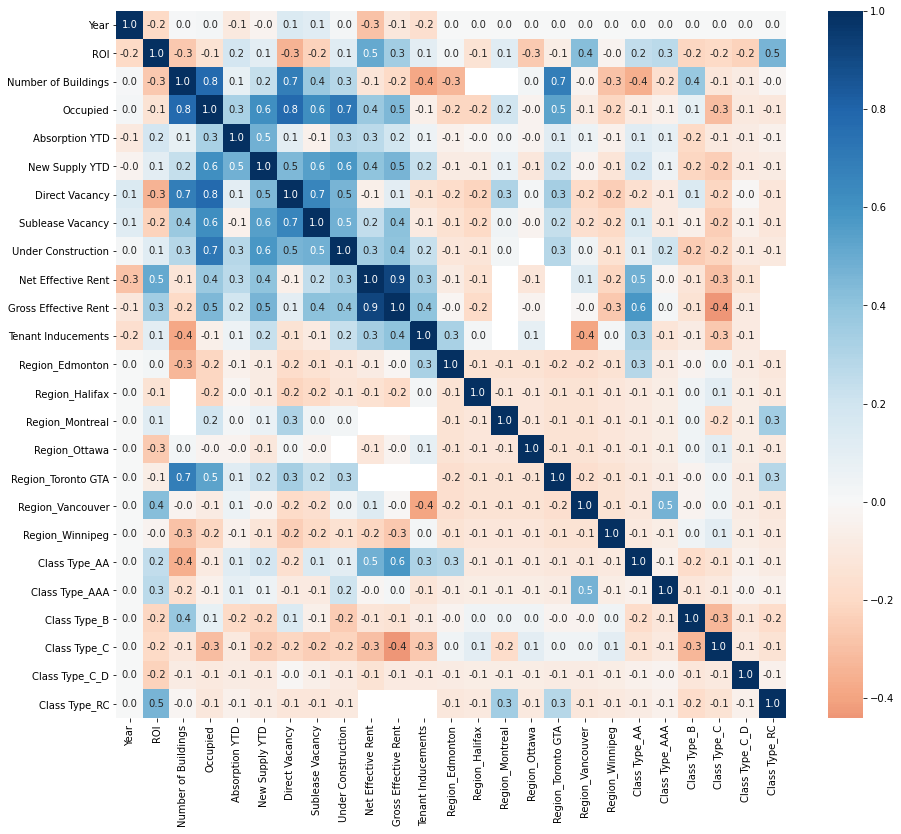

In [9]:
#heatmap using seaborn
#If the correlation between variables if greater than 0.7 we can say that the two variables are highly correlated. 
#From the above table, the pairs of highly correlated variables are:
fig, ax = plt.subplots()
fig.set_size_inches(15, 13)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
plt.savefig("mycorr.png")

From the correlation matrix, we can explore the relationship between ROI and all independent variables, and we can find highly correlated independent variables pairs.

Based on the Correlation Analysis of Excercise 5, we know that independent variables 'Region_Edmonton',' Region_Winnipeg', 'Region_Toronto GTA', 'New Supply YTD', 'Tenant Inducements', and 'Under Construction' are irrelevant with target variables ROI, so we will drop them when developing the model.

In [10]:
#Remove certain variables from the onset (i.e., spending and sequence number)
Office_df = df.drop([ 'Region_Edmonton','Region_Winnipeg', 'Region_Toronto GTA', 'New Supply YTD', 
                  'Tenant Inducements', 'Under Construction' ], axis=1)

In [11]:
Office_df.shape

(280, 19)

**After dropping the irrelevant variables, the office_df database is useful with 280 records and 19 fields, which are 18 independent variables and 1 target variable. All fields are numerical.**

## 3. Fitting a Regression Model 

## (1)use all 18 relevant independent variables to develop the original model.

In [12]:
## Import required packages
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [13]:
Office_df = Office_df.dropna(how='any')

In [14]:
X=Office_df.drop(columns=['ROI'])
y=Office_df['ROI']

In [15]:
# TRAINING(60%) AND VALIDATION(40%) - partition the data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

**Develope the Model using the Training Data**

In [16]:
#fit regression model
Office_lm = LinearRegression()
Office_lm.fit(train_X, train_y)

LinearRegression()

In [17]:
# print coefficients
print('intercept ', Office_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': Office_lm.coef_}))

intercept  44.50653641443019
               Predictor   coefficient
0                   Year -2.180118e-02
1    Number of Buildings -3.185979e-04
2               Occupied  4.197088e-08
3         Absorption YTD -1.557315e-07
4         Direct Vacancy -9.162352e-08
5       Sublease Vacancy -3.057264e-07
6     Net Effective Rent  3.776374e-02
7   Gross Effective Rent -3.248972e-02
8         Region_Halifax -1.942890e-16
9        Region_Montreal -1.249001e-16
10         Region_Ottawa -3.107947e-01
11      Region_Vancouver  1.329435e-01
12         Class Type_AA  4.581767e-01
13        Class Type_AAA  2.954632e-01
14          Class Type_B -1.386412e-01
15          Class Type_C -1.400040e-01
16        Class Type_C_D -2.874112e-01
17         Class Type_RC  0.000000e+00


In [18]:
# print performance measures (training data)
regressionSummary(train_y, Office_lm.predict(train_X))


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 0.1221
     Mean Absolute Error (MAE) : 0.0911


**Make the Predictions for the Validation Data**

In [19]:
#Make the Predictions for the Validation Data(and show some residuals)
# Use predict() to make predictions on a new set
Office_lm_pred = Office_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': Office_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - Office_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, Office_lm_pred)

     Predicted  Actual  Residual
132   0.027107    0.20  0.172893
65    0.040316   -0.02 -0.060316
108   0.307503    0.11 -0.197503
35    0.346666    0.52  0.173334
66   -0.037504   -0.03  0.007504
268   0.474615    0.64  0.165385
111   0.851768    0.90  0.048232
47    0.032006    0.12  0.087994
269   0.382102    0.66  0.277898
267   0.458363    0.48  0.021637
123   0.243282    0.35  0.106718
262   0.656379    0.50 -0.156379
277   0.668624    0.51 -0.158624
126  -0.370941   -0.31  0.060941
110   0.701447    0.65 -0.051447
105   0.273133    0.03 -0.243133
102   1.116980    1.08 -0.036980
79    0.120679   -0.06 -0.180679
46    0.021092    0.14  0.118908
101   0.840247    1.18  0.339753

Regression statistics

                      Mean Error (ME) : 0.0045
       Root Mean Squared Error (RMSE) : 0.1694
            Mean Absolute Error (MAE) : 0.1317
          Mean Percentage Error (MPE) : 14.9662
Mean Absolute Percentage Error (MAPE) : 99.3299


## (2) Modify the model with predictors selecting.

**Use subset selection algorithms to reduce the remaining predictors.**

**a. Backward**

In [20]:
#backward elimination
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Year, Number of Buildings, Occupied, Absorption YTD, Direct Vacancy, Sublease Vacancy, Net Effective Rent, Gross Effective Rent, Region_Halifax, Region_Montreal, Region_Ottawa, Region_Vancouver, Class Type_AA, Class Type_AAA, Class Type_B, Class Type_C, Class Type_C_D, Class Type_RC
Start: score=-68.11
Step: score=-70.11, remove Region_Halifax
Step: score=-72.11, remove Region_Montreal
Step: score=-74.11, remove Class Type_RC
Step: score=-75.98, remove Number of Buildings
Step: score=-75.98, remove None
['Year', 'Occupied', 'Absorption YTD', 'Direct Vacancy', 'Sublease Vacancy', 'Net Effective Rent', 'Gross Effective Rent', 'Region_Ottawa', 'Region_Vancouver', 'Class Type_AA', 'Class Type_AAA', 'Class Type_B', 'Class Type_C', 'Class Type_C_D']


In [21]:
# Compute common accuracy measures
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 0.0071
       Root Mean Squared Error (RMSE) : 0.1702
            Mean Absolute Error (MAE) : 0.1313
          Mean Percentage Error (MPE) : 14.7356
Mean Absolute Percentage Error (MAPE) : 98.1198


**b. Forward Elimination**

In [22]:
#The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Year, Number of Buildings, Occupied, Absorption YTD, Direct Vacancy, Sublease Vacancy, Net Effective Rent, Gross Effective Rent, Region_Halifax, Region_Montreal, Region_Ottawa, Region_Vancouver, Class Type_AA, Class Type_AAA, Class Type_B, Class Type_C, Class Type_C_D, Class Type_RC
Start: score=67.81, constant
Step: score=36.33, add Region_Vancouver
Step: score=9.58, add Direct Vacancy
Step: score=-3.51, add Net Effective Rent
Step: score=-11.87, add Class Type_C
Step: score=-24.84, add Class Type_C_D
Step: score=-29.97, add Year
Step: score=-36.83, add Class Type_B
Step: score=-43.25, add Gross Effective Rent
Step: score=-53.02, add Class Type_AA
Step: score=-56.42, add Class Type_AAA
Step: score=-59.40, add Number of Buildings
Step: score=-60.59, add Sublease Vacancy
Step: score=-64.58, add Occupied
Step: score=-72.02, add Absorption YTD
Step: score=-74.11, add Region_Ottawa
Step: score=-74.11, add None
['Region_Vancouver', 'Direct Vacancy', 'Net Effective Rent', 'Class T

In [23]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 0.0045
       Root Mean Squared Error (RMSE) : 0.1694
            Mean Absolute Error (MAE) : 0.1317
          Mean Percentage Error (MPE) : 14.9662
Mean Absolute Percentage Error (MAPE) : 99.3299


**c. stepwise**

In [24]:
#In some other cases, Except at each step, also consider dropping non-significant predictors
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Year, Number of Buildings, Occupied, Absorption YTD, Direct Vacancy, Sublease Vacancy, Net Effective Rent, Gross Effective Rent, Region_Halifax, Region_Montreal, Region_Ottawa, Region_Vancouver, Class Type_AA, Class Type_AAA, Class Type_B, Class Type_C, Class Type_C_D, Class Type_RC
Start: score=67.81, constant
Step: score=36.33, add Region_Vancouver
Step: score=9.58, add Direct Vacancy
Step: score=-3.51, add Net Effective Rent
Step: score=-11.87, add Class Type_C
Step: score=-24.84, add Class Type_C_D
Step: score=-29.97, add Year
Step: score=-36.83, add Class Type_B
Step: score=-43.25, add Gross Effective Rent
Step: score=-53.02, add Class Type_AA
Step: score=-56.42, add Class Type_AAA
Step: score=-59.40, add Number of Buildings
Step: score=-60.59, add Sublease Vacancy
Step: score=-64.58, add Occupied
Step: score=-72.02, add Absorption YTD
Step: score=-74.11, add Region_Ottawa
Step: score=-75.98, remove Number of Buildings
Step: score=-75.98, unchanged None
['Region_Vancouv

In [25]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : 0.0071
       Root Mean Squared Error (RMSE) : 0.1702
            Mean Absolute Error (MAE) : 0.1313
          Mean Percentage Error (MPE) : 14.7356
Mean Absolute Percentage Error (MAPE) : 98.1198


**After Use three subset selection algorithms to reduce the remaining predictors, we can see that Backward Elimination and Stepwise select the same 14 independent variables, which perform best based on the MAE and MAPE.**

**In the Backward Elimination and Stepwise, the MAE=0.1313 and MAPE=98.1198, which are the lowest among three ways and also lower than that of the model using all 18 independent variables with MAE=0.1317 and MAPE=99.3299, so we will select the predictors from Backward Elimination or Stepwise to develop the final model.**

**Therefore, there are 14 independent variables to predict the target variable ROI, which are 'Region_Vancouver', 'Direct Vacancy', 'Net Effective Rent', 'Class Type_C', 'Class Type_C_D', 'Year', 'Class Type_B', 'Gross Effective Rent', 'Class Type_AA', 'Class Type_AAA', 'Sublease Vacancy', 'Occupied', 'Absorption YTD', 'Region_Ottawa'.**

## (3) Use 14 selected independent variables to develop the best model.

In [26]:
New_df = Office_df[[ 'Region_Vancouver', 'Direct Vacancy', 'Net Effective Rent', 'Class Type_C', 'Class Type_C_D', 'Year', 
                    'Class Type_B', 'Gross Effective Rent', 'Class Type_AA', 'Class Type_AAA', 'Sublease Vacancy', 'Occupied',
                    'Absorption YTD', 'Region_Ottawa', 'ROI']]

In [27]:
New_df.columns = [c.replace(' ', '_') for c in New_df.columns]

In [28]:
New_df

,Region_Vancouver,Direct_Vacancy,Net_Effective_Rent,Class_Type_C,Class_Type_C_D,Year,Class_Type_B,Gross_Effective_Rent,Class_Type_AA,Class_Type_AAA,Sublease_Vacancy,Occupied,Absorption_YTD,Region_Ottawa,ROI
30,0,454889.0,22.30,0,0,2011,0,37.63,1,0,23789.0,3554759.0,379852.0,0,0.93
31,0,372353.0,23.22,0,0,2012,0,38.05,1,0,16346.0,3644738.0,89979.0,0,1.08
32,0,398635.0,24.28,0,0,2013,0,41.16,1,0,15982.0,3618820.0,-25918.0,0,0.87
33,0,381295.0,18.99,0,0,2014,0,37.06,1,0,11730.0,2616417.0,19048.0,0,0.47
34,0,335238.0,19.66,0,0,2015,0,38.26,1,0,38441.0,2657385.0,19346.0,0,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,1,432901.0,14.64,1,0,2016,0,26.09,0,0,9746.0,5635742.0,-14516.0,0,0.40
276,1,356706.0,10.72,1,0,2017,0,20.74,0,0,41567.0,6387341.0,44374.0,0,0.31
277,1,253644.0,0.00,1,0,2018,0,0.00,0,0,17402.0,6333740.0,127227.0,0,0.51
278,1,407085.0,0.00,1,0,2019,0,0.00,0,0,117216.0,6690245.0,-272877.0,0,0.62


In [29]:
X = New_df.drop(columns=['ROI'])
y = New_df['ROI']

In [30]:
# TRAINING(60%) AND VALIDATION(40%) - partition the data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [31]:
#fit regression model
Best_lm = LinearRegression()
Best_lm.fit(train_X, train_y)

LinearRegression()

In [32]:
# print coefficients
print('intercept ', Best_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': Best_lm.coef_}))

intercept  44.220405089426876
               Predictor   coefficient
0       Region_Vancouver  1.174870e-01
1         Direct_Vacancy -9.646021e-08
2     Net_Effective_Rent  3.788425e-02
3           Class_Type_C -1.622636e-01
4         Class_Type_C_D -3.105637e-01
5                   Year -2.165588e-02
6           Class_Type_B -1.606160e-01
7   Gross_Effective_Rent -3.245683e-02
8          Class_Type_AA  4.596715e-01
9         Class_Type_AAA  3.117929e-01
10      Sublease_Vacancy -2.957404e-07
11              Occupied  3.910849e-08
12        Absorption_YTD -1.500324e-07
13         Region_Ottawa -3.284752e-01


In [33]:
# print performance measures (training data)
regressionSummary(train_y, Best_lm.predict(train_X))


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.1222
     Mean Absolute Error (MAE) : 0.0909


In [34]:
#Make the Predictions for the Validation Data(and show some residuals)
# Use predict() to make predictions on a new set
Best_lm_pred = Best_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': Best_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - Best_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, Best_lm_pred)

     Predicted  Actual  Residual
132   0.025658    0.20  0.174342
65    0.038373   -0.02 -0.058373
108   0.299112    0.11 -0.189112
35    0.349752    0.52  0.170248
66   -0.036246   -0.03  0.006246
268   0.470363    0.64  0.169637
111   0.844916    0.90  0.055084
47    0.041141    0.12  0.078859
269   0.377668    0.66  0.282332
267   0.455508    0.48  0.024492
123   0.254320    0.35  0.095680
262   0.650384    0.50 -0.150384
277   0.673074    0.51 -0.163074
126  -0.367191   -0.31  0.057191
110   0.703031    0.65 -0.053031
105   0.264660    0.03 -0.234660
102   1.099398    1.08 -0.019398
79    0.105677   -0.06 -0.165677
46    0.031435    0.14  0.108565
101   0.834965    1.18  0.345035

Regression statistics

                      Mean Error (ME) : 0.0071
       Root Mean Squared Error (RMSE) : 0.1702
            Mean Absolute Error (MAE) : 0.1313
          Mean Percentage Error (MPE) : 14.7356
Mean Absolute Percentage Error (MAPE) : 98.1198


In [35]:
# run a linear regression of Price on the remaining 11 predictors in the training set
train_df = train_X.join(train_y)
predictors = train_X.columns
formula = 'ROI ~ ' + ' + '.join(predictors)
Best_lm = sm.ols(formula=formula, data=train_df).fit()
Best_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROI   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     35.65
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           8.27e-25
Time:                        11:53:19   Log-Likelihood:                 53.988
No. Observations:                  79   AIC:                            -77.98
Df Residuals:                      64   BIC:                            -42.43
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               44.2204     14.453      3.060      0.003      15.347      73.094
Region_Vancouver         0.1175      0.066      1.793      0.078      -0.013       0.248
Direct_Vacancy       -9.646e-08   2.19e-08     -4.410      0.000    -1.4e-07   -5.28e-08
Net_Effective_Rent       0.0379      0.009      4.045      0.000       0.019       0.057
Class_Type_C            -0.1623      0.074     -2.206      0.031      -0.309      -0.015
Class_Type_C_D          -0.3106      0.078     -3.977      0.000      -0.467      -0.155
Year                    -0.0217      0.007     -3.019      0.004      -0.036      -0.007
Class_Type_B            -0.1606      0.051     -3.154      0.002      -0.262      -0.059
Gross_Effective_Rent    -0.0325      0.007     -4.343      0.000      -0.047      -0.018
Class_Type_AA            0.4597      0.076      6.057      0.000       0.308       0.611
Class_Type_AAA           0.3118      0.081      3.872      0.000       0.151       0.473
Sublease_Vacancy     -2.957e-07   6.49e-08     -4.556      0.000   -4.25e-07   -1.66e-07
Occupied              3.911e-08   8.13e-09      4.808      0.000    2.29e-08    5.54e-08
Absorption_YTD         -1.5e-07   4.82e-08     -3.114      0.003   -2.46e-07   -5.38e-08
Region_Ottawa           -0.3285      0.160     -2.053      0.044      -0.648      -0.009
==============================================================================
Omnibus:                        2.268   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.758
Skew:                           0.090   Prob(JB):                        0.415
Kurtosis:                       3.708   Cond. No.                     9.31e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The result illustrates that the R Square equals 0.886, which is a very good fit. 88.6% of the variation in target variable 'ROI' is explained by the 14 independent variables, the Significance F is less than 0.05, so the model is fit well.**

**In addition, In terms of the significance of 14 independent variables, It shows that the P-values of 13 independent variables are below 0.05 (except Region_Vancouver), and the P-value of Region_Vancouver is still below 0.1, so all these independent variables are statistically significant.**

**Therefore, we use this model to form a final model variable report.**

## 4.Validating The Model Performance

In [36]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

**Decile and Gains Char**

In [37]:
# reorder the predicted values in descending order and calculate the cumulative sum
pred_v = pd.Series(Best_lm.predict(valid_X))
pred_v = pred_v.sort_values(ascending=False)
pred_v

102    1.099398
240    0.946701
111    0.844916
101    0.834965
250    0.813813
103    0.781337
32     0.772942
110    0.703031
245    0.687425
277    0.673074
246    0.662424
255    0.653261
261    0.652331
262    0.650384
34     0.603812
112    0.590185
270    0.560759
263    0.520050
264    0.505353
42     0.471990
265    0.471359
268    0.470363
266    0.467145
267    0.455508
113    0.399627
220    0.384761
269    0.377668
35     0.349752
224    0.300858
108    0.299112
273    0.266068
105    0.264660
123    0.254320
61     0.249797
233    0.208173
63     0.200790
124    0.118047
79     0.105677
130    0.099334
47     0.041141
65     0.038373
46     0.031435
132    0.025658
69     0.006797
66    -0.036246
119   -0.064133
116   -0.170947
135   -0.203149
115   -0.258755
137   -0.274987
139   -0.337963
126   -0.367191
99    -0.857759
dtype: float64

Text(0.5, 1.0, 'Cumulative Gains Chart')

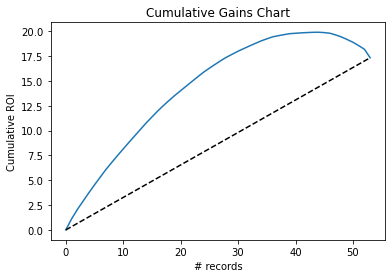

In [38]:
ax = gainsChart(pred_v)
ax.set_ylabel('Cumulative ROI')
ax.set_title('Cumulative Gains Chart')

Text(0, 0.5, 'Lift')

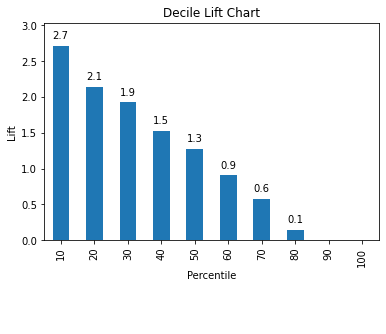

In [39]:
ax = liftChart(pred_v)
ax.set_ylabel('Lift')

**From the Decile and Gains Char, we can see that the ROI with the model is higher than that of without the model(randomly).**

**Therefore, The model performs well. We can use it to predict the ROI of new data.**